## Training a Logistic Regression Model, SVM, and Random Forest Classifier

In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import joblib
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
# Loading the data
df=pd.read_csv('../data/cleaned_data.csv')
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [5]:
df['text']=df["headline"] + " " + df["short_description"]
df.head()

,link,headline,category,short_description,authors,date,text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


In [6]:
# import label encoder
le= joblib.load('../outputs/models/label_encoder.pkl')
# Features
X=  df['text']
# Encoding categories
y= le.transform(df['category'])

# Checking for null values
X.dropna(inplace=True)
y = y[X.index]  # Align y with the filtered X

tfif= TfidfVectorizer()
# Transforming the text data into TF-IDF features
X = tfif.fit_transform(X.values.astype('U'))
# Saving the TF-IDF model
joblib.dump(tfif, '../outputs/models/tfidf_vectorizer.pkl')
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)



              precision    recall  f1-score   support

           0       0.53      0.10      0.17       173
           1       0.49      0.15      0.23       259
           2       0.56      0.35      0.43       862
           3       0.50      0.48      0.49       947
           4       0.45      0.24      0.31       178
           5       0.62      0.43      0.51       926
           6       0.50      0.47      0.48       559
           7       0.66      0.19      0.30       236
           8       0.84      0.67      0.74       713
           9       0.52      0.26      0.34       186
          10       0.56      0.79      0.66      3009
          11       0.63      0.20      0.31       290
          12       0.48      0.07      0.11       230
          13       0.62      0.76      0.69      1258
          14       0.53      0.10      0.17       187
          15       0.44      0.29      0.35       395
          16       0.49      0.15      0.23      1070
          17       0.75    

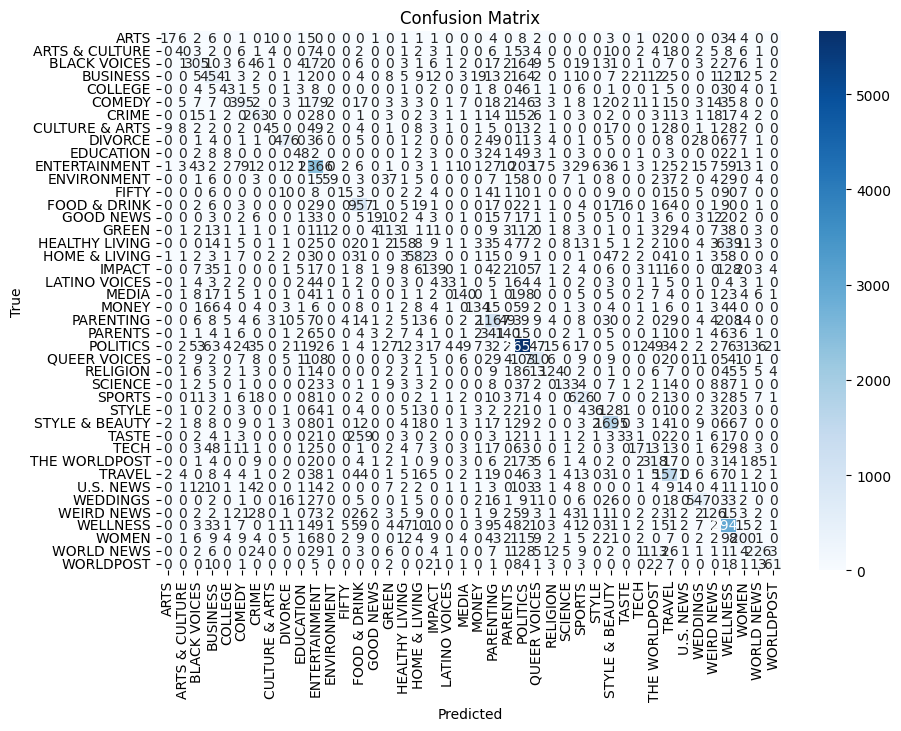

Accuracy: 61.38%


In [7]:
# logistic regression model
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
# Saving the model
joblib.dump(log_reg, '../outputs/models/logistic_regression_model.pkl')

# Predicting the test set results
y_pred= log_reg.predict(X_test)
# Evaluating the model
print(classification_report(y_test, y_pred))
# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../outputs/plots/confusion_matrix_logistic_regression.png')
plt.show()

# Accuracy score
accuracy= log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


/home/saber/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746715076.278483   38292 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/20


I0000 00:00:1746715079.928435   44210 service.cc:152] XLA service 0x7f3cd8003d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746715079.928478   44210 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-08 14:37:59.951141: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746715080.052552   44210 cuda_dnn.cc:529] Loaded cuDNN version 91000
2025-05-08 14:38:00.637921: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_503', 8 bytes spill stores, 8 bytes spill loads



   1/1899 ━━━━━━━━━━━━━━━━━━━━ 1:51:23 4s/step - accuracy: 0.0156 - loss: 3.7370

I0000 00:00:1746715081.749407   44210 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1899/1899 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.3958 - loss: 2.4154

2025-05-08 14:42:49.509510: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 12 bytes spill stores, 12 bytes spill loads

2025-05-08 14:42:49.585811: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 8 bytes spill stores, 8 bytes spill loads

2025-05-08 14:42:49.710056: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 112 bytes spill stores, 112 bytes spill loads

2025-05-08 14:44:04.218201: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 12 bytes spill stores, 12 bytes spill loads

2025-05-08 14:44:04.452895: I external/local_xla

1899/1899 ━━━━━━━━━━━━━━━━━━━━ 367s 191ms/step - accuracy: 0.3958 - loss: 2.4151 - val_accuracy: 0.6031 - val_loss: 1.4381
Epoch 2/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.7093 - loss: 1.0166 - val_accuracy: 0.6110 - val_loss: 1.4153
Epoch 3/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8337 - loss: 0.5808 - val_accuracy: 0.5983 - val_loss: 1.5757
Epoch 4/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9108 - loss: 0.3157 - val_accuracy: 0.5882 - val_loss: 1.8517
Epoch 5/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9559 - loss: 0.1630 - val_accuracy: 0.5785 - val_loss: 2.1395
Epoch 6/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9780 - loss: 0.0864 - val_accuracy: 0.5684 - val_loss: 2.4446
Epoch 7/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9886 - loss: 0.0495 - val_accuracy: 0.5665 - val_loss: 2.6926
Epoch 8/20
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9922 - loss: 0.0

2025-05-08 14:49:55.817826: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24', 4 bytes spill stores, 4 bytes spill loads

2025-05-08 14:49:55.868201: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_31', 4 bytes spill stores, 4 bytes spill loads

2025-05-08 14:49:55.905506: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24', 12 bytes spill stores, 12 bytes spill loads



1187/1187 ━━━━━━━━━━━━━━━━━━━━ 60s 50ms/step
                precision    recall  f1-score   support

          ARTS       0.22      0.12      0.16       173
ARTS & CULTURE       0.35      0.22      0.27       259
  BLACK VOICES       0.41      0.43      0.42       862
      BUSINESS       0.35      0.45      0.40       947
       COLLEGE       0.27      0.25      0.26       178
        COMEDY       0.41      0.46      0.43       926
         CRIME       0.41      0.43      0.42       559
CULTURE & ARTS       0.35      0.30      0.32       236
       DIVORCE       0.74      0.69      0.71       713
     EDUCATION       0.39      0.36      0.37       186
 ENTERTAINMENT       0.66      0.64      0.65      3009
   ENVIRONMENT       0.33      0.30      0.31       290
         FIFTY       0.21      0.12      0.15       230
  FOOD & DRINK       0.59      0.66      0.62      1258
     GOOD NEWS       0.17      0.18      0.17       187
         GREEN       0.32      0.28      0.30       395
HE

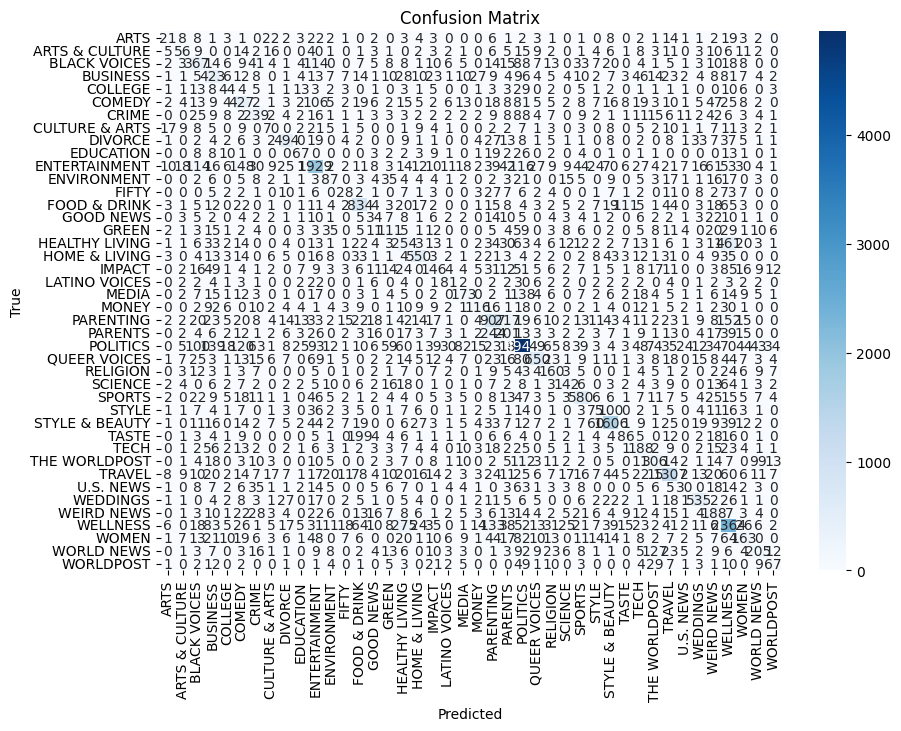

Accuracy: 56.00%


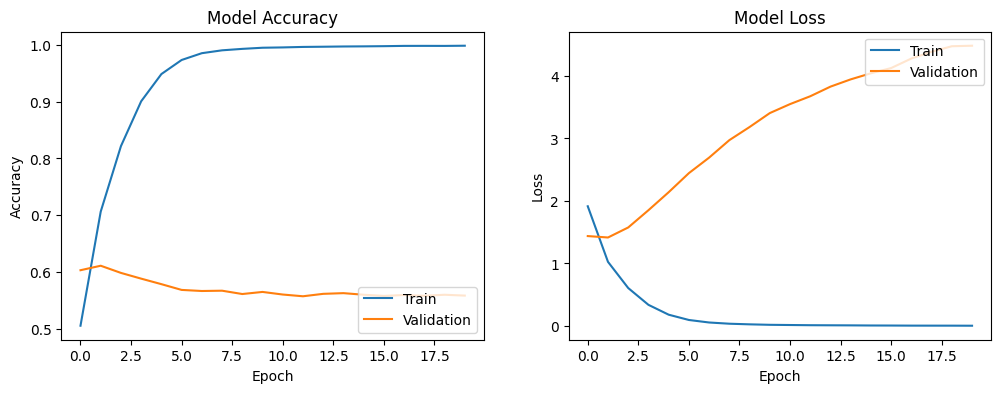

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Create TF model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Save model
model.save('../outputs/models/tensorflow_model.keras')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../outputs/plots/confusion_matrix_tensorflow.png')
plt.show()

# Accuracy score
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

# Training history plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('../outputs/plots/training_history_tensorflow.png')
plt.show()

In [ ]:
# SVC
svc= SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
# Saving the model
joblib.dump(svc, '../outputs/models/svc_model_linear.pkl')

# Predicting the test set results

y_pred_svc= svc.predict(X_test)
# Evaluating the model
print(classification_report(y_test, y_pred_svc))
# Confusion matrix

cm_svc= confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../outputs/plots/confusion_matrix_svc_linear.png')
plt.show()

# Accuracy score
accuracy_svc= svc.score(X_test, y_test)
print(f"Accuracy: {accuracy_svc*100:.2f}%")